# Exercice 1 : Decouverte de l'Environnement

In [2]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from traffic_env import TrafficEnvironment

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [7 9 7 3] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [ 7 10  2  2]
  🎯 Reward (Cars Passed): 7
----------------------------------------
Step 2:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [5 9 4 4]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [1 7 5 5]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [2 9 0 1]
  🎯 Reward (Cars Passed): 7
----------------------------------------
Step 5:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 6 0 1]
  🎯 Reward (Cars Passed): 4
------------

- ***Objectif :*** Comprendre le fonctionnement de l'environnement de simulation de trafic en observant ses états et actions.

In [5]:
# Initialisation de l'environnement
env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0  # Action choisie arbitrairement
    next_state, reward = env.step(action)
    print(f"État {next_state}, Récompense : {reward}")


État [4 1 7 8], Récompense : 1
État [1 2 8 8], Récompense : 3
État [1 2 9 9], Récompense : 3
État [ 2  2 11  9], Récompense : 2
État [ 1  2 12  9], Récompense : 4
État [ 1  0 13 10], Récompense : 3
État [ 1  2 15 11], Récompense : 1
État [ 1  1 15 12], Récompense : 3
État [ 2  1 15 13], Récompense : 2
État [ 2  2 17 15], Récompense : 3


# Exercice 2 : Implementation de Q-Learning

- ***Objectif :*** Mettre en œuvre l'algorithme Q-Learning pour optimiser la prise de décision de l'agent.

In [3]:
# Paramètres du Q-Learning
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur d'actualisation
epsilon = 0.1  # Stratégie exploration/exploitation

# Fonction pour normaliser l'état afin qu'il corresponde à la table Q
def get_state_index(state):
    return tuple(np.clip(state // 2, 0, 5))  # S'assurer que l'index est dans [0, 5]

# Initialisation de la Q-table
Q = np.zeros((6, 6, 6, 6, 2))  # Espace d'état 4D + 2 actions

# Implémentation du Q-Learning
def q_learning(env, episodes=5000):
    q_rewards = []  # Stockage des récompenses
    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)
        total_reward = 0

        for _ in range(100):  # Limite d'itérations par épisode
            # Sélection de l'action avec epsilon-greedy
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(Q[state_idx])
            
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)

            # Mise à jour de la Q-table
            Q[state_idx + (action,)] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx + (action,)])

            total_reward += reward
            state_idx = next_state_idx  # Passage à l'état suivant

        q_rewards.append(total_reward)
        if (episode + 1) % 1000 == 0:
            print(f"✅ Episode {episode + 1}/{episodes} terminé.")
    
    return Q, q_rewards

# Entraînement de l'agent
q_table, q_learning_rewards = q_learning(env)
print("✅ Entraînement terminé !")

✅ Episode 1000/5000 terminé.
✅ Episode 2000/5000 terminé.
✅ Episode 3000/5000 terminé.
✅ Episode 4000/5000 terminé.
✅ Episode 5000/5000 terminé.
✅ Entraînement terminé !


# Exercice 3 : Implementation de SARSA

- ***Objectif :*** Mettre en œuvre l'algorithme SARSA pour comparer son efficacité avec Q-Learning.

In [4]:
def sarsa(env, episodes=5000):
    S_rewards = []  # Stockage des récompenses
    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)
        action = np.random.choice([0, 1])
        total_reward = 0

        for _ in range(100):
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)
            next_action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(Q[next_state_idx])
            
            # Mise à jour de la Q-table avec SARSA
            Q[state_idx + (action,)] += alpha * (reward + gamma * Q[next_state_idx + (next_action,)] - Q[state_idx + (action,)])
            
            total_reward += reward
            state_idx, action = next_state_idx, next_action
        
        S_rewards.append(total_reward)
        if (episode + 1) % 1000 == 0:
            print(f"✅ Episode {episode + 1}/{episodes} terminé.")
    
    return Q, S_rewards

# Entraînement de l'agent avec SARSA
q_table_sarsa, sarsa_rewards = sarsa(env)
print("✅ Entraînement SARSA terminé !")

✅ Episode 1000/5000 terminé.
✅ Episode 2000/5000 terminé.
✅ Episode 3000/5000 terminé.
✅ Episode 4000/5000 terminé.
✅ Episode 5000/5000 terminé.
✅ Entraînement SARSA terminé !


# Exercice 4 : Analyse et Visualisation des Resutats

- ***Objectif :*** Comparer la performance de Q-Learning et SARSA à travers la visualisation des récompenses cumulées.

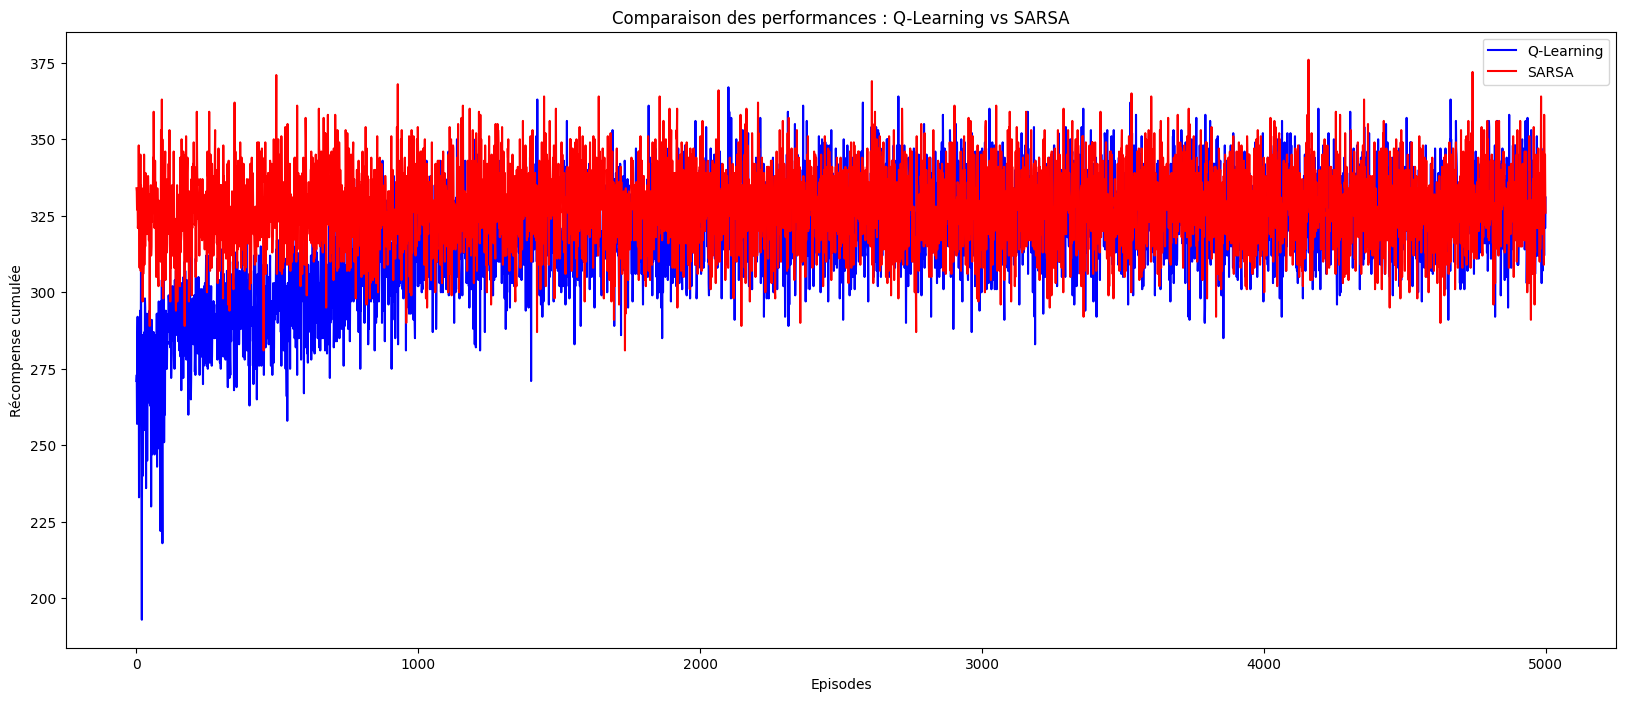

✅ Analyse terminée !


In [6]:
plt.figure(figsize=(20, 8))
plt.plot(q_learning_rewards, label="Q-Learning", color='b')
plt.plot(sarsa_rewards, label="SARSA", color='r')
plt.xlabel("Episodes")
plt.ylabel("Récompense cumulée")
plt.title("Comparaison des performances : Q-Learning vs SARSA")
plt.legend()
plt.show()

print("✅ Analyse terminée !")
